<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch05_TD_Ex3_S%C3%A9rie_Chronologique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch5 - Notebook : Statistiques bivariées :** 
## **Exercice 3 "Série chronologique, lissage par moyennes mobiles"**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **Étude d'une série chronologique.**



Les données sont importées depuis un fichier csv et stockées dans un dataFrame Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/othoni-hub/ECG2/main/co2_court.csv"
# attention : import depuis Github : copier le "raw-github-link"
df = pd.read_csv(url, sep = ",", encoding='utf-8') # le fichier importé est un fichier .csv, séparateur virgule, converti en DataFrame Pandas
df.tail()

,année,num_mois,date_decimale,Moyenne_mois,Moyenne_interpolee,Tendance,nb_jours_mois
61,2013,2,2013.125,396.79,396.79,395.89,27
62,2013,3,2013.208,397.31,397.31,395.82,30
63,2013,4,2013.292,398.40,398.40,395.73,27
64,2013,5,2013.375,399.73,399.73,396.50,31
65,2013,6,2013.458,398.58,398.58,396.29,27


In [3]:
df.describe()

,année,num_mois,date_decimale,Moyenne_mois,Moyenne_interpolee,Tendance,nb_jours_mois
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2010.272727,6.227273,2010.750000,390.381970,390.381970,390.217576,28.727273
std,1.612885,3.467633,1.599684,4.064522,4.064522,3.414565,3.061148
min,2008.000000,1.000000,2008.042000,382.990000,382.990000,384.400000,10.000000
25%,2009.000000,3.000000,2009.395750,387.227500,387.227500,387.202500,28.000000
50%,2010.000000,6.000000,2010.750000,390.190000,390.190000,390.325000,29.500000
75%,2012.000000,9.000000,2012.104250,393.100000,393.100000,392.797500,30.000000
max,2013.000000,12.000000,2013.458000,399.730000,399.730000,396.500000,31.000000


In [4]:
Dates = list(df['date_decimale'])
TauxCO2 = list(df['Moyenne_mois'])

In [5]:
x_bar = np.mean(Dates)
y_bar = np.mean(TauxCO2)

* **Représentation graphique**

En statistiques, on commence toujours par se donner une image des données.

In [6]:
def centrax(xmin, xmax, ymin, ymax, titre, legende = [], axe_x = "", axe_y = ""):
    '''Cette procédure ajuste les paramètres graphiques : fenêtre (xmin, xmax, ymin, ymax), titre, légende (vide par défaut)'''
    # ajustement des paramètres des axes (centrage, couleur, etc.)
    ax = plt.gca()
    ax.legend(legende, loc = 'best')
    

    plt.xlim(xmin,xmax)   
    plt.ylim(ymin,ymax)         # fenêtre d'affichage
    plt.title(titre)            # titre du graphique au format LaTeX (encadré par des $)
    plt.xlabel(axe_x)           # nom des axes
    plt.ylabel(axe_y)

    plt.show()

In [7]:
# paramètres graphiques
xmin = np.floor(min(Dates))
xmax = np.floor(max(Dates))+1
ymin = np.floor(min(TauxCO2))
ymax = np.floor(max(TauxCO2))+1
titre = "Évolution du taux de CO2 dans l'atmosphère"
axe_x = "Année"
axe_y = "TauxCO2(ppm)"

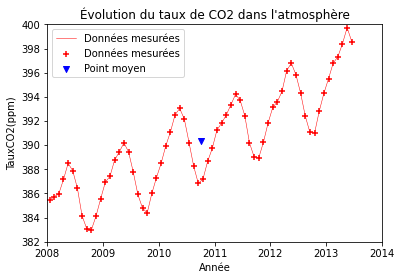

In [8]:
plt.scatter(Dates,TauxCO2 , marker ='+',color = 'red')  # représentation graphique du nuage de points 
plt.plot(Dates,TauxCO2 ,color = 'red', linewidth = 0.5)                  
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")   # placement du point moyen
legende=['Données mesurées','Données mesurées','Point moyen']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

On observe qu'au cours d'une même année, le taux de CO2 atmosphérique augment dès la fin de l'été, sur toute la période de chauffage des bâtiments, puis diminue à nouveau à partir d'avril.

Par contre, ce qui est (devrait être) plus inquiétant, c'est la hausse globale d'une année sur l'autre !!!

## **Lissage par moyennes mobiles**

Les **"moyennes mobiles"** ou **"moyennes glissantes"** permettent de corriger les variations saisonnières : on remplace chaque valeur d'un mois donné par les moyennes des 3, 6 ou 12 mois contigus.

In [9]:
def moyennes_glissantes(periode) :
    colors = {3 :'black',6 :'green', 9 : 'blue', 12 :'purple'}
    moyennes_glissantes_periode = [np.mean(TauxCO2[k : k + periode]) for k in range(0,len(Dates)-periode)]

    plt.scatter(Dates,TauxCO2 , marker ='+',color = 'red')  # représentation graphique du nuage de points 
    plt.plot(Dates,TauxCO2 ,color = 'red', linewidth = 0.5)                  
    plt.scatter(x_bar,y_bar,marker = "v", color = "blue")   # placement du point moyen
    nb_valeurs = len(Dates)-periode
    date_basse = int(periode/2)
    date_haute = date_basse + nb_valeurs
    plt.plot(Dates[date_basse : date_haute], moyennes_glissantes_periode, color = colors[periode], linewidth = 0.5)
    legende=['Données mesurées','Moyennes glissantes sur '+ str(periode) +' mois','Données mesurées','Point moyen']
    centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

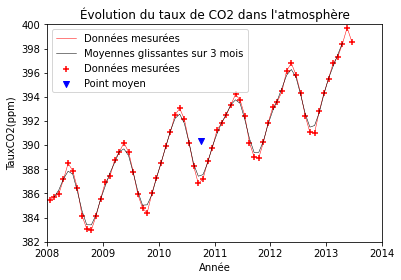

In [10]:
moyennes_glissantes(3)

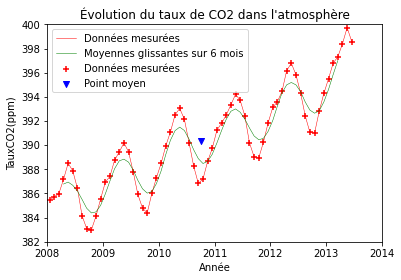

In [11]:
moyennes_glissantes(6)

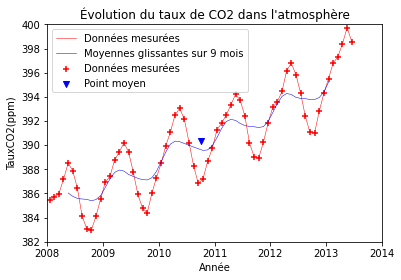

In [12]:
moyennes_glissantes(9)

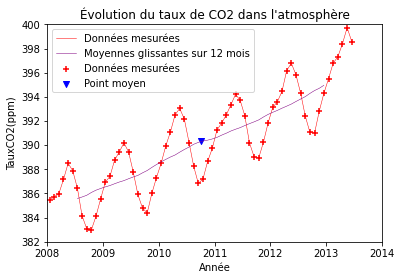

In [13]:
moyennes_glissantes(12)

## **Régression linéaire**

Calculons et représentons la droite d'ajustement du nuage de points de cette série chronologique.

In [14]:
def droite(xx,a,b) :
    '''Cette fonction reçoit un vecteur d'abscisse, un coefficient directeur a et une ordonnée à l'origine b
    et trace la droite y = ax + b'''
    yy = [a*x + b for x in xx]
    plt.plot(xx,yy,color  ='blue', linewidth = 0.5)

In [15]:
def covariance_empirique(x,y) :
    '''Cette fonction reçoit deux listes x et y, de même taille, 
    et renvoie la covariance de ces deux listes
    Remarque : si x = y, on obtient la variance de x.'''
    xbar = np.mean(x)
    ybar = np.mean(y)
    n = len(x)

    s_XY = 1/n * sum([(x[k] - xbar)*(y[k] - ybar) for k in range(n)])
    return s_XY

In [16]:
s_XY = covariance_empirique(Dates, TauxCO2)
s_XY

5.403136515151526

In [17]:
def coeff_droite_regression(x,y):
    '''Cette fonction reçoit deux listes x et y de même taille,
    et renvoie les coefficients de la droite d'ajustemennt de y en x'''
    xbar = np.mean(x)
    ybar = np.mean(y)

    # pente
    a = covariance_empirique(x, y) / covariance_empirique(x, x)
    # ordonnée à l'origine
    b = ybar - a * xbar
    return a, b

In [18]:
a,b = coeff_droite_regression(Dates, TauxCO2)
print('Équation de la droite de régression de Y en X : y=' + str(a) + '.x + ' + str(b))

Équation de la droite de régression de Y en X : y=2.1439166095117073.x + -3920.4983528786956


In [19]:
def y_ajuste(xx,a,b):
    '''Cette fonction reçoit une liste xx, les coeeficients caractéristiques de la droite de régression
    et renvoie la liste des ordonnées ajustées sur cette droite'''
    yy = [a*x + b for x in xx]
    return yy

* On calcule les taux ajustés, débarrassés des variations saisonnières.

In [20]:
taux_ajustes = y_ajuste(Dates,a,b)


**Représentation graphique**

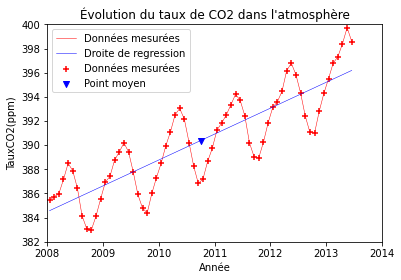

In [21]:
plt.scatter(Dates,TauxCO2 , marker ='+',color = 'red')  # représentation graphique du nuage de points 
plt.plot(Dates,TauxCO2 ,color = 'red', linewidth = 0.5)                  
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")   # placement du point moyen

droite(Dates, a, b)

legende=['Données mesurées','Droite de regression','Données mesurées','Point moyen']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

### **Variations saisonnières**

On peut également visualiser uniquement les variations saisonnières : il suffit de faire la différence entre les données réelles et les valeurs ajustées.

On parle alors de ***série des données corrigées des variations saisonnières***

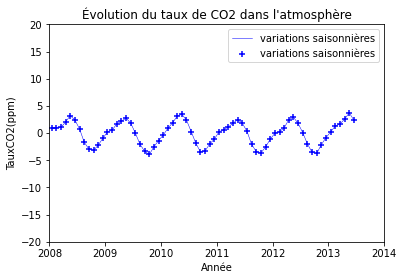

In [22]:
variations_saisonnieres = [TauxCO2[k] - taux_ajustes[k] for k in range(len(TauxCO2))]
ymin = -20
ymax = 20

plt.scatter(Dates,variations_saisonnieres , marker ='+',color = 'blue')  # représentation graphique du nuage de points  des variations saisonnieres 
plt.plot(Dates,variations_saisonnieres ,color = 'blue', linewidth = 0.5)  

legende=['variations saisonnières','variations saisonnières']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)

Il pourrait être amusant de regarder ce qui se passe quand on gomme à nouveau ces variations saisonnières...

Il ne restera qu'une variation résiduelle, due peut-être à des évenements particuliers ponctuels, météorologiques, par exemple, ou même tout simplement au hasard.

L'ajustement n'est clairement pas linéaire, la courbe des variations saisonnières ressemblerait plus à une sinusoïde, c'est-à-dire une fonction de la forme $r(x) = \alpha . \sin \left ( \omega  x + \phi \right )$.

Cherchons un ajustement avec trois petits curseurs...

## **graphique interactif**



In [23]:
from ipywidgets import interact
from IPython.display import display
from math import sin, pi

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Intéragir sur les curseurs pour faire coller au mieux, au jugé, la sinusoïde avec le nuage de points.

In [24]:

def graph_interactif(alpha, omega, phi):
    plt.scatter(Dates,variations_saisonnieres , marker ='+',color = 'blue')  # représentation graphique du nuage de points  des variations saisonnieres

    xx = np.arange(xmin , xmax , 0.05)
    yy = [alpha*sin(omega*(x+phi)) for x in xx]  
    plt.plot(xx,yy, color = 'orange', linewidth = 0.5)
    centrax(xmin, xmax, ymin, ymax, titre, "", axe_x, axe_y)
interact(graph_interactif, alpha = (1, 5, 0.5), omega = (1,10, 0.05), phi = (-6, 6,0.05))

interactive(children=(FloatSlider(value=3.0, description='alpha', max=5.0, min=1.0, step=0.5), FloatSlider(val…

<function __main__.graph_interactif>

Avec $r(x) = 3.5  \sin \left ( 6.35  x + 1.55 \right )$, on n'est pas mal !

Et voilà donc nos variations résiduelles :

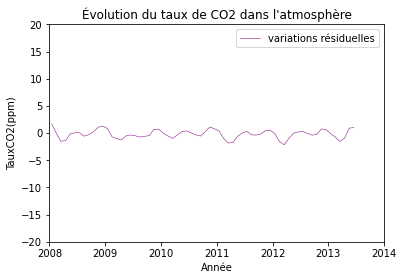

In [25]:
alpha = 3.5
omega = 6.35
phi = 1.55

variations_saisonnieres_ajustees = [alpha*sin(omega*(x+phi)) for x in Dates]  
variations_residuelles = [variations_saisonnieres[k] - variations_saisonnieres_ajustees[k] for k in range(len(Dates))]

plt.plot(Dates,variations_residuelles ,color = 'purple', linewidth = 0.5)  

legende=['variations résiduelles']
centrax(xmin, xmax, ymin, ymax, titre, legende, axe_x, axe_y)